In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Week 1

### Goal 1: Practice plotting a dot

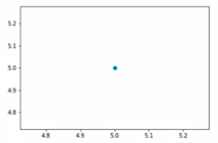

### Goal 1 Result

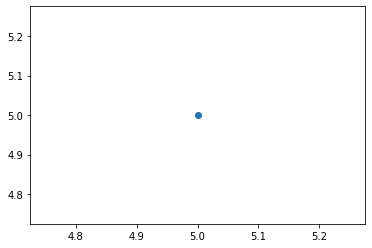

In [2]:
plt.plot(5,5,'o')
plt.show()

### Goal 2: Read dataset into notebook and organize for plotting

Read tha canada data into the notebook, and organize as diplayed below, by the name df_canada:

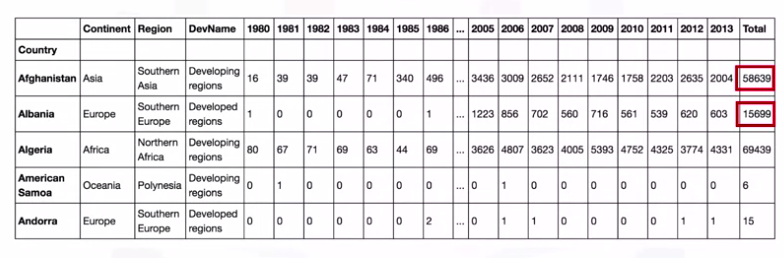

### Goal 2 Result

In [3]:
df_canada = pd.read_excel('Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
df_canada = df_canada.iloc[:,:43] # Remove empty columns at the end
df_canada.drop(columns= ['Type', 'Coverage', 'AREA', 'REG', 'DEV'], inplace=True) # drop unneeded cols

df_canada = df_canada.rename(columns=lambda x: str(x))

df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True) # rename as above
df_canada.set_index('Country', inplace=True) # Set country as index

years = [str(i) for i in list(range(1980, 2014))]
df_canada['Total'] = df_canada[years].sum(axis=1)
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


### Goal 3: Line plot

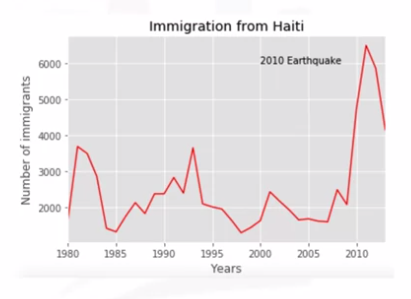

### Goal 3 Result

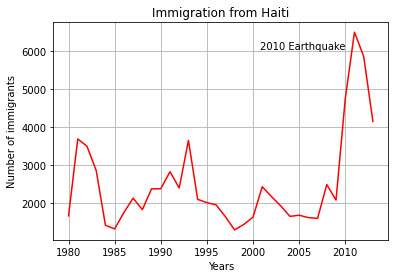

In [4]:
df_haiti = df_canada.loc[df_canada.index == 'Haiti', years]
x = list(df_haiti.columns)
y = df_haiti.values.flatten().tolist()
plt.plot(x,y, 'r-')
# display(x)
# display(y)
# print(plt.plot(x,y, 'r-'))

plt.xlabel('Years')
plt.xticks(ticks=x[::5])

plt.ylabel('Number of immigrants')
plt.title('Immigration from Haiti')

plt.text('2010',6000,'2010 Earthquake',ha='right', va='bottom')

plt.grid()
plt.show()

### Goal 3 actual

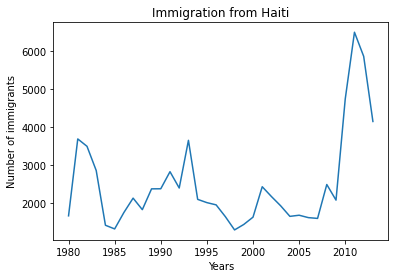

In [5]:
years = list(map(str, range(1980,2014)))
df_canada.loc['Haiti', years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

## Week 2

### Goal 4: Area plot

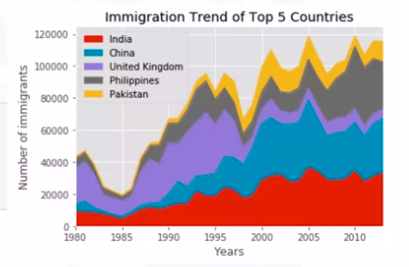

### Goal 4 Result

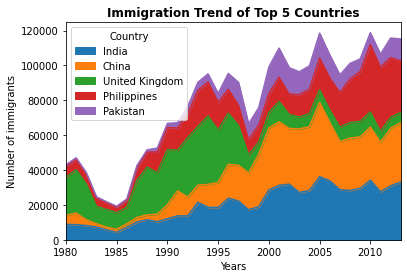

In [25]:
(df_canada
.loc[['India', 'China', 'United Kingdom of Great Britain and Northern Ireland', 'Philippines', 'Pakistan'], years]
.rename(index={'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'})
.transpose()
.plot(kind='area'))

plt.margins(x=0)

plt.title('Immigration Trend of Top 5 Countries',fontweight='bold')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')


plt.show()

### Goal 4 actual

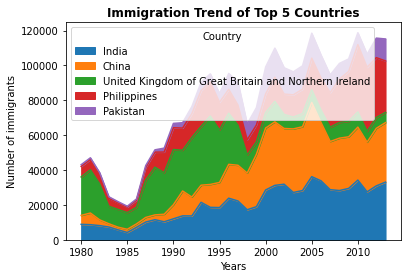

In [32]:
years = list(map(str,range(1980,2014)))

df_canada.sort_values('Total', ascending=False, axis=0, inplace=True)

df_top5 = df_canada.head()
df_top5 = df_top5[years].transpose()

df_top5.plot(kind='area')
plt.title('Immigration Trend of Top 5 Countries',fontweight='bold')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

### Goal 5: Histogram plot

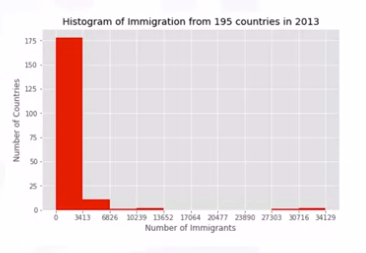

### Goal 5 Result

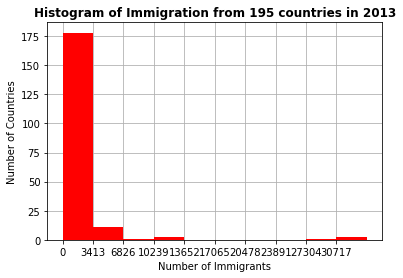

In [72]:
df_canada['2013'].hist(color='red')
plt.xticks(list(range(0,34130,3413)))

plt.rcParams['axes.axisbelow'] = True

plt.title('Histogram of Immigration from 195 countries in 2013', fontweight='bold')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

plt.show()

### Goal 5 actual

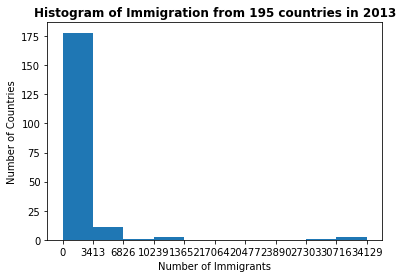

In [73]:
count, bin_edges = np.histogram(df_canada['2013'])

df_canada['2013'].plot(kind='hist', xticks = bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013', fontweight='bold')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

plt.show()

### Goal 6: Bar chart

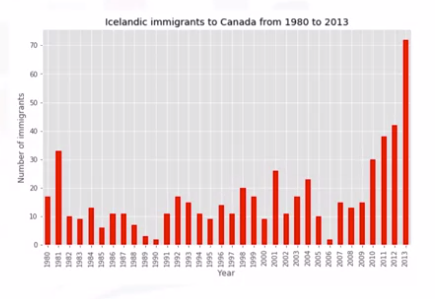

### Goal 6 Result

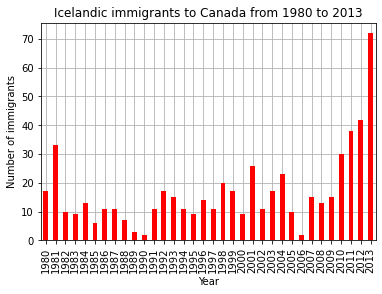

In [82]:
df_canada.loc['Iceland', years].plot(kind='bar', color='red')

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')

plt.grid()

plt.show()

### Goal 6 Actual

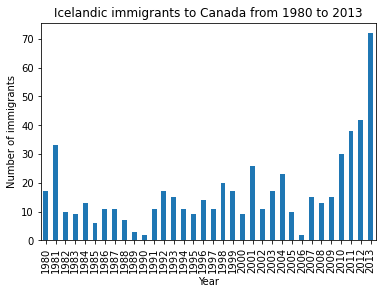

In [84]:
years = list(map(str, range(1980, 2014)))

df_iceland = df_canada.loc['Iceland', years]

df_iceland.plot(kind='bar')

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')

plt.show()

### Goal 7: Pie chart

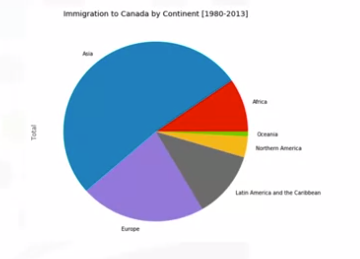

### Goal 7 Results

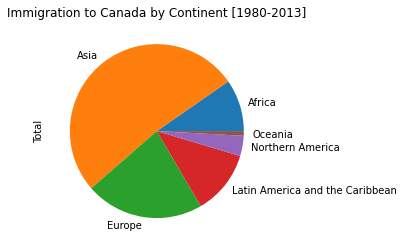

In [90]:
df_canada.groupby('Continent')['Total'].sum().plot(kind='pie')

plt.title('Immigration to Canada by Continent [1980-2013]')

plt.show()

### Goal 7 actual

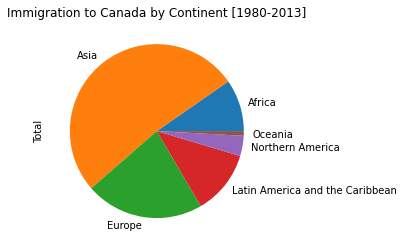

In [93]:
df_continents = df_canada.groupby('Continent', axis=0).sum()
df_continents['Total'].plot(kind='pie')

plt.title('Immigration to Canada by Continent [1980-2013]')

plt.show()

### Goal 8: Box Plots

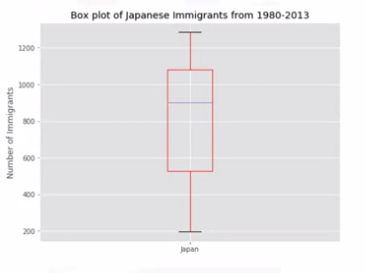

### Goal 8 Results

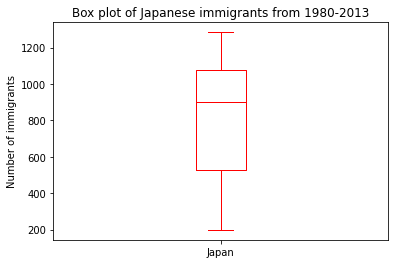

In [98]:
df_japan = df_canada.loc['Japan', years]
df_japan.plot(kind='box', color = 'red')

plt.title('Box plot of Japanese immigrants from 1980-2013')
# plt.xlabel('Japan')
plt.ylabel('Number of immigrants')

plt.show()

### Goal 8 Actual

### Goal 8: Scatter Plots

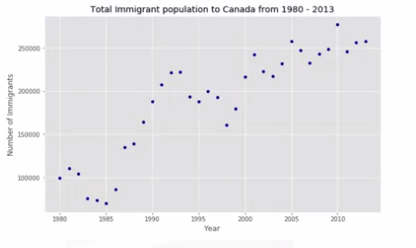

The df_total is a dataframe as follows:

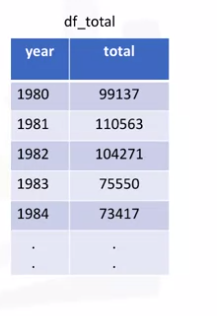

## Week 3

### Goal 9: Waffle Chart

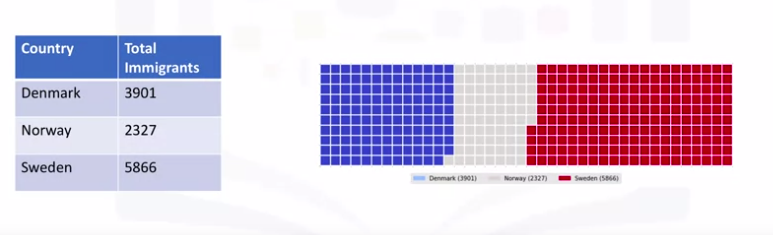

### Goal 10: Regression Plot with Seaborn

Use seaborn and df_total to create the below visualisation

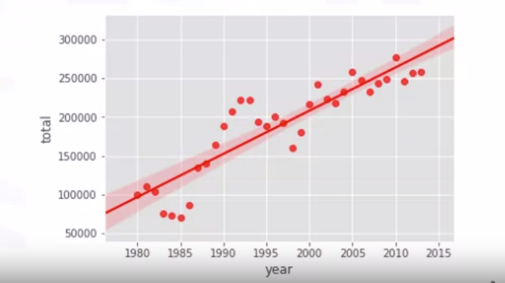

### Goal 11: Use Folium to Create a map of Canada

Use Folium to create a map of Canada that looks like below:

latitude and longitude of canada are 56.130 and -106.35

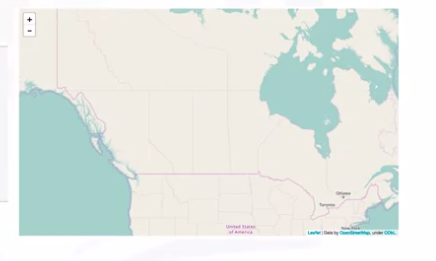

### Goal 12: Add marker with label to map

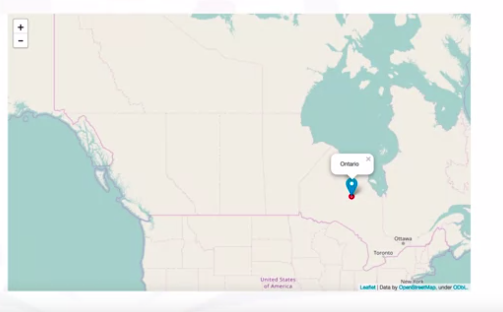

### Goal 13: Create Choropleth Map of Immigration into Canada

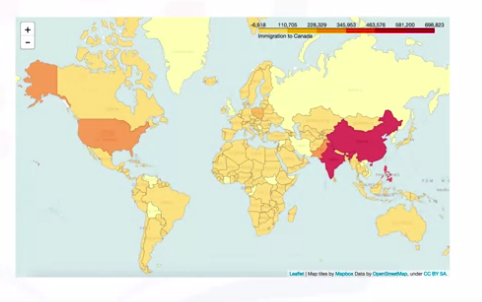

You will need to use a json file called world_countries.json. Get it from the jupyter notebook